<span style="font-size: 24pt;">Telco Churn Factors</span>





<span style="font-size: 16pt">Goal: To look at certain factors in the Telco dataset and determine if the impact churn</span>

<span style="font-size: 16pt;">I will also look at the factors that I took a personal interest in</span>

In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from acquire import get_telco_data
from prepare import chop_data,prep_telco,keep_cust_prep_telco, keep_cust_prep_telco
from Exo import churners, gender_impact,senior_citizen_churn, security_impact, churner_mannwit,senior_mannwit
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,export_text, plot_tree


import warnings

warnings.filterwarnings('ignore')

<span style="font-size: 16pt;">ACQUIRE<span>
    
    
    
    
<span style="font-size: 16pt;">access the telco dataset at kaggle here:<span> 
    
    
<span style="font-size: 16pt;">https://www.kaggle.com/datasets/blastchar/telco-customer-churn<span>
    
<span style="font-size: 14pt;">* Originally contained 20 columns and 7043 rows<span>
    
<span style="font-size: 14pt;">* The columns were different characteristics of customers and factors that affected their billing<span>

<span style="font-size: 16pt;">PREPARE<span>
    

<table style="font-size: 18px;">
  <tr>
    <th>Original Columns</th>
    <th>Data Modifications</th>
  </tr>
  <tr>
    <td>total_charges</td>
    <td>changed to a float and replaced blank spaces</td>
  </tr>
  <tr>
    <td>gender</td>
    <td>changed to 1 or 0 representing gender/td>
  </tr>
  <tr>
    <td>partner</td>
    <td>changed to 1 or 0 representing single or not</td>
  </tr>
  <tr>
    <td>dependents</td>
    <td>changed to 1 or 0 representing whether or not have dependents</td>
  </tr>
  <tr>
    <td>churn</td>
    <td>changed to 1 or 0 representing whether person has discontinued their service</td>
  </tr>
  <tr>
    <td>phone_service</td>
    <td>changed to 1 or 0 representing whether person has phone service</td>
  </tr>
  <tr>
    <td>multiple_lines</td>
    <td>changed to 1 or 0 representing whether person has internet service</td>
  </tr>
  <tr>
    <td>paperless_billing</td>
    <td>changed to 1 or 0 representing whether person has paperless billing</td>
  </tr>
  <tr>
    <td>internet_service_type</td>
    <td>chna1 or 0 representing whether person has internet services</td>
  </tr>
  <tr>
    <td>dropped and made dummies for 1 or 0</td>
    <td>payment_type,contract_type</td>
  <tr>
    <td>merged to new columns for 1 or 0</td>
    <td>streaming_movies,streaming_tv,tech_support</td>
   
    

In [77]:
base = prep_telco(get_telco_data) # Acquiring data and performing cleaning and encoding actions

In [61]:
trained_telco,validated_telco,tested_telco = chop_data(base,"churn") #Separating data into train,validate,test

<span style="font-size: 16pt;">Data preview can be seen here:<span> 

In [51]:
trained_telco.head(5)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,security_backup,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
2865,1,1,1,0,38,1,1,0,95.00,3591.25,0,1,1,0,1,0,0,1,0,0
4107,1,1,0,0,2,1,0,1,70.35,139.05,1,1,0,1,0,0,0,0,1,0
3453,0,1,1,0,11,1,0,0,19.95,214.75,1,0,0,1,0,0,0,0,0,1
923,0,0,0,0,10,1,1,1,86.05,834.10,1,1,0,1,0,0,1,0,0,0
2370,0,0,0,0,43,1,0,1,60.00,2548.55,0,1,1,0,0,1,0,0,1,0


<span style="font-size: 24pt;">Data Dictionary</span>

<table style="font-size: 18px;">
  <tr>
    <th>Characteristic</th>
    <th>Data Type</th>
  </tr>
  <tr>
    <td>gender</td>
    <td>1 or 0 representing gender</td>
  </tr>
  <tr>
    <td>senior_citizen</td>
    <td>1 or 0 representing senior status</td>
  </tr>
  <tr>
    <td>partner</td>
    <td>1 or 0 representing single or not</td>
  </tr>
  <tr>
    <td>dependents</td>
    <td>1 or 0 representing whether or not have dependents</td>
  </tr>
  <tr>
    <td>tenure</td>
    <td>int describing period of subscription in months</td>
  </tr>
  <tr>
    <td>phone_service</td>
    <td>1 or 0 representing whether person has phone service</td>
  </tr>
  <tr>
    <td>multiple_lines</td>
    <td>1 or 0 representing whether person has internet service</td>
  </tr>
  <tr>
    <td>paperless_billing</td>
    <td>1 or 0 representing whether person has paperless billing</td>
  </tr>
  <tr>
    <td>monthly_charges</td>
    <td>int describing monthly charges</td>
  </tr>
  <tr>
    <td>total_charges</td>
    <td>int describing monthly charges</td>
  </tr>
  <tr>
    <td>churn</td>
    <td>1 or 0 representing whether person has kept services or discontinued them</td>
  </tr>
  <tr>
    <td>internet_service_type</td>
    <td>1 or 0 representing whether person has internet services</td>
  </tr>
  <tr>
    <td>security_backup</td>
    <td>1 or 0 representing whether person has internet services</td>


# Function Definitions



## get_telco_data
**Purpose:** Retrieves telco dataframe from the Codeup database.

## prep_telco
**Purpose:** Prepares and encodes the dataframe.

## chop_data
**Purpose:** Turns into datasets train,vaildate,test.

## keep_cust_prep_telco
**Purpose:** Keeps customer ID on dataframe for Prediction file.

## churners
**Purpose:** Tells whether monthly charges are a driver of churn.

## gender_impact
**Purpose:** Tells whether gender is a driver of churn.

## security_impact
**Purpose:** Tells whether gender impacts purchases of security bundles.

## senior_citizen_churn
**Purpose:** Tells whether age is a driver of churn.

## churner_mannwit
**Purpose:** Runs mannwhitney test to determine p_value.

## senior_mannwit
**Purpose:** Runs mannwhitney test to determine p_value.

In [64]:
trained_telco.describe()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,security_backup,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,0.499172,0.164260,0.488757,0.299172,32.650178,0.906746,0.428639,0.593373,65.138947,2305.884888,0.265325,0.782722,0.473136,0.552663,0.208047,0.239290,0.221302,0.217988,0.339408,0.221302
std,0.500058,0.370556,0.499933,0.457949,24.647481,0.290823,0.494940,0.491262,30.336884,2282.408946,0.441559,0.412442,0.499337,0.497278,0.405959,0.426701,0.415172,0.412928,0.473565,0.415172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,35.400000,408.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,70.550000,1389.350000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000,90.400000,3886.450000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<span style="font-size: 24pt;">Explore</span>

<span style="font-size: 16pt;">Do people churn faster as monthly charges increase?</span>

<span style="font-size: 14pt;">Ho People do not drop service as monthly charges increase</span>

<span style="font-size: 14pt;">Ha People drop service as monthly charges increase</span>

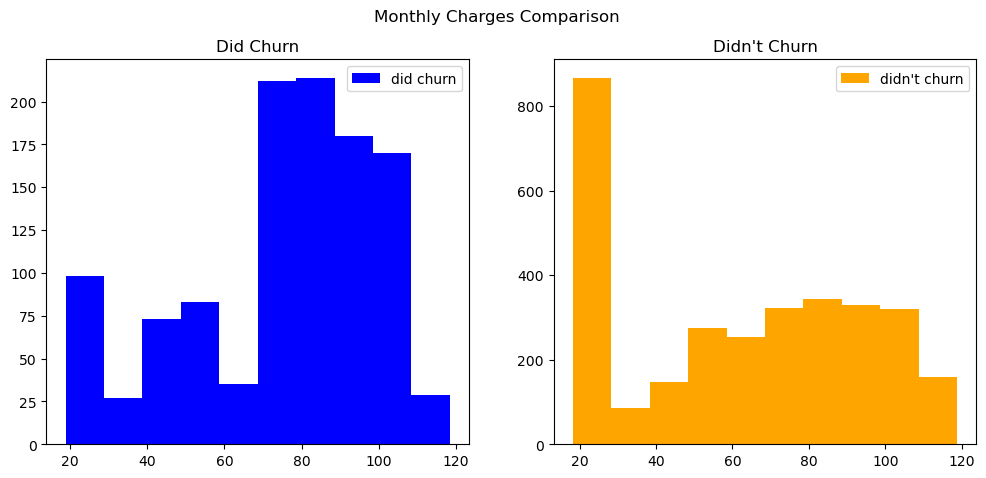

In [4]:
churners(trained_telco)

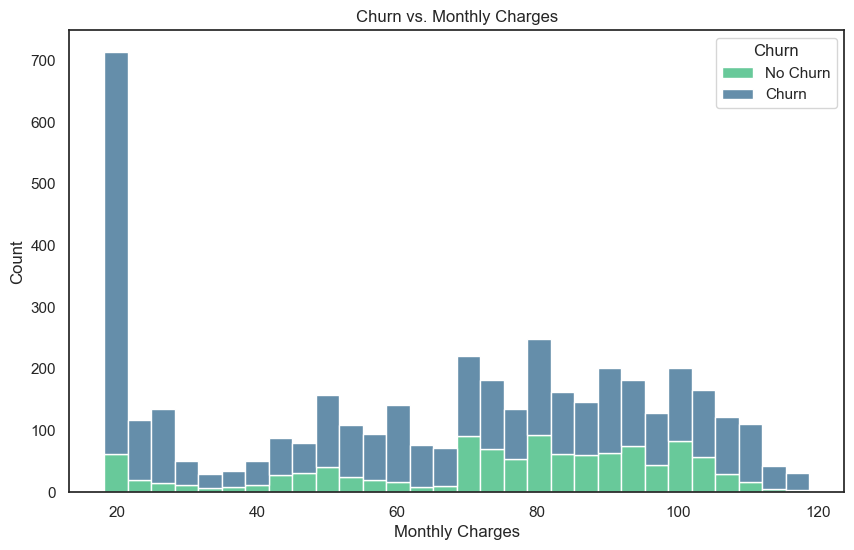

In [108]:

sns.set(style="white")


plt.figure(figsize=(10, 6))
sns.histplot(trained_telco, x='monthly_charges', hue='churn', multiple="stack", bins=30, kde=False, palette='viridis')

plt.title('Churn vs. Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')

plt.legend(title='Churn', labels=['No Churn', 'Churn'])

plt.show()

<span style="font-size: 16pt;">Based off the test results I can conclude monthy charges play a big part in whether a customer churns or not</span>

<span style="font-size: 16pt;">Does Gender have any impact on rate of churn?</span>

<span style="font-size: 14pt;">Ho Gender has no effect on churn rate</span>

<span style="font-size: 14pt;">Ha Gender does have an effect on churn rate</span>

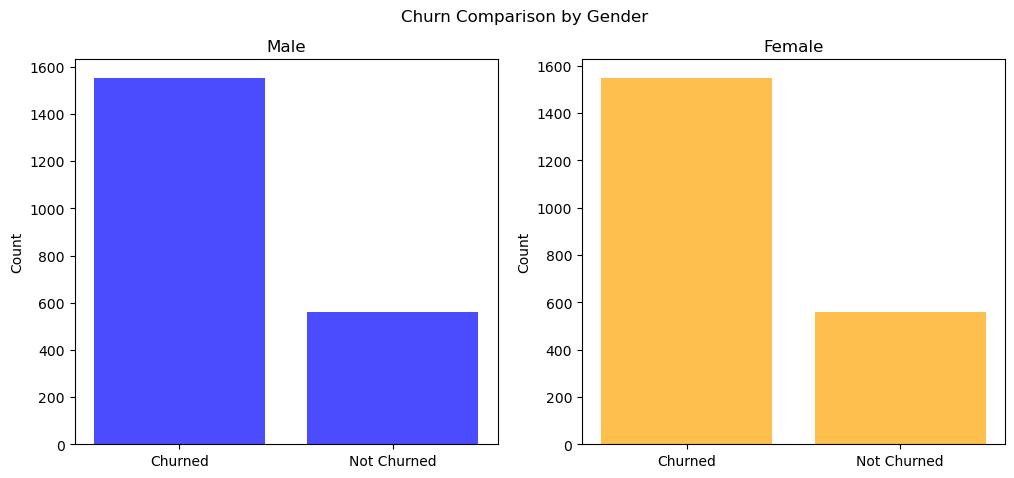

In [71]:
gender_impact(trained_telco)

In [67]:
gender__churn_rate = pd.crosstab(columns=trained_telco.gender,index=trained_telco.churn)

In [68]:
gender__churn_rate

gender,0,1
churn,,
0,1554,1550
1,562,559


In [69]:
chi2, gender_pval, degf, expected = stats.chi2_contingency(gender__churn_rate)

In [72]:
gender_pval

0.996031931504371

<span style="font-size: 16pt;">Based off test results with p being a larger value than alpa of .05 I can conclude gender does not play a large role in whether or not a customer churns and fail to reject null hypothesis</span>

<span style="font-size: 16pt;">Does gender have any impact on purchase of security packages?</span>

<span style="font-size: 14pt;">Ho Gender does not have an impact on purhase of security package</span>

<span style="font-size: 14pt;">Ha Gender does have an impact on purhase of security packages</span>

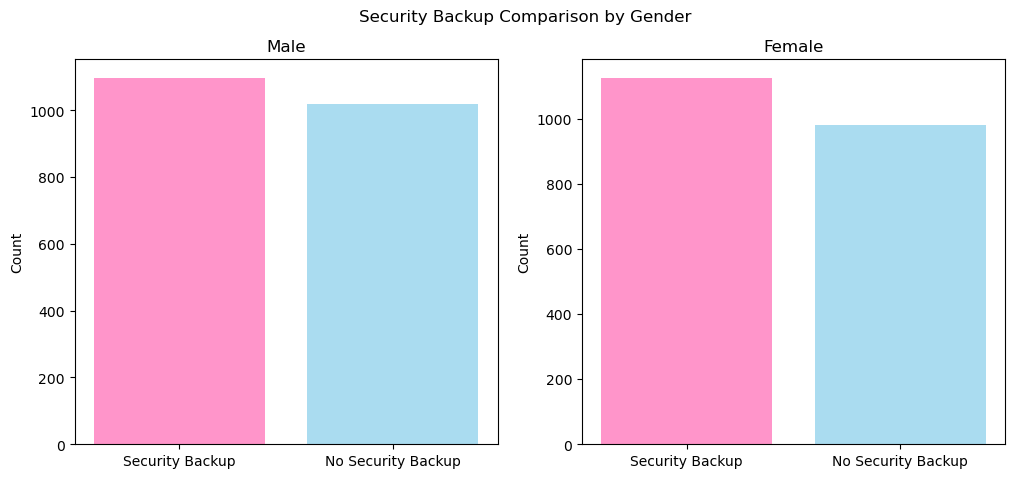

In [11]:
security_impact(trained_telco)

In [12]:
security_purchase_rate = pd.crosstab(columns=trained_telco.security_backup,index=trained_telco.gender)

In [13]:
security_purchase_rate 

security_backup,0,1
gender,,
0,1098,1018
1,1128,981


In [14]:
chi2, security_pval, degf, expected = stats.chi2_contingency(security_purchase_rate)

In [73]:
security_pval

0.3138183526114294

<span style="font-size: 16pt;">Based off test results with p being a larger value than alpa of .05 I can conclude gender does not play a large role in whether or not a customer purchases security features and fail to reject null hypothesis<span>

<span style="font-size: 16pt;">Do senior citizens churn faster than non senior citizens?</span>

<span style="font-size: 14pt;">Ho Senior citizens do not churn faster than non senior citizens</span>

<span style="font-size: 14pt;">Ha Senior citizens churn faster than non senior citizens</span>

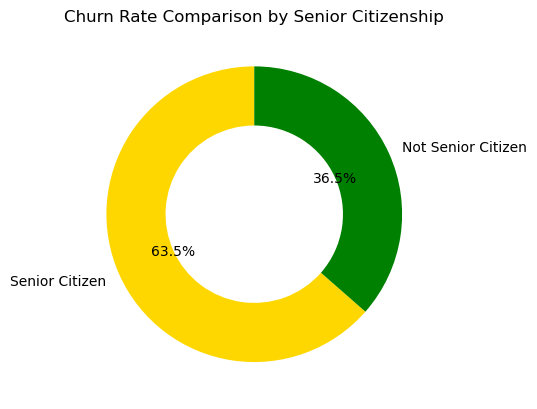

In [17]:
senior_citizen_churn(trained_telco)

In [18]:
senior_mannwit(trained_telco)

Mann-Whitney U Statistic (Senior Citizens): 1399475.5
P-value: 1.930405954296988e-26
Reject the null hypothesis. There is a significant difference in monthly charges between churned and  non-               churned senior citizens.


<span style="font-size: 16pt;">Based off the test results I can conclude whether a person is a senior citizen plays a big part in whether they churn or not. Reject null hypothesis</span>

<span style="font-size: 24pt;">Modeling</span>

<span style="font-size: 16pt;">I chose to move on with gender, security, and senior status for my drivers, even though two of the three were not drivers, I was curious if age would results or increase accuracy<span>

In [19]:
classy = DecisionTreeClassifier() # USING THREE DEPTHS DECISION TREE FOR MDOELING

In [22]:
y_train4.value_counts(normalize=True)[0] #BASELINE ACCURACY CHURN

0.7346745562130178

In [20]:
X_train4 = trained_telco[["gender","security_backup","senior_citizen"]]
X_validate4 = validated_telco[["gender","security_backup","senior_citizen"]] 
X_test4 = tested_telco[["gender","security_backup","senior_citizen"]] 

In [21]:
y_train4 = trained_telco.churn #Create y target variables
y_validate4 = validated_telco.churn
y_test4 = tested_telco.churn

In [86]:
classy4 = DecisionTreeClassifier(max_depth=4) #Creates decision tree models
classy10 =DecisionTreeClassifier(max_depth=10)
classy20 =DecisionTreeClassifier(max_depth=20)

In [87]:
classy4.fit(X_train4,y_train4)
classy10.fit(X_train4,y_train4)
classy20.fit(X_train4,y_train4)

DecisionTreeClassifier(max_depth=20)

In [27]:
classy4.score(X_train4,y_train4)

0.7420118343195267

In [28]:
classy10.score(X_train4,y_train4)

0.7420118343195267

In [29]:
classy20.score(X_train4,y_train4)

0.7420118343195267

In [30]:
classy4.score(X_validate4,y_validate4)

0.7331440738112136

In [31]:
classy10.score(X_validate4,y_validate4)

0.7331440738112136

In [32]:
classy20.score(X_validate4,y_validate4)

0.7331440738112136

<span style="font-size: 16pt;">All three model depths came out roughly the same, yet still beat the baseline accuracy<span>

<span style="font-size: 24pt;">Conclusion</span>

# <span style="font-size: 18px;">Exploration Summary</span>

## <span style="font-size: 18px;">Churn Rate Analysis</span>

- <span style="font-size: 18px;">**Age Impact:**</span>
  - <span style="font-size: 18px;">The churn rate is influenced by the age of the customers. Initiatives should be taken to incentivize older customers to keep service

- <span style="font-size: 18px;">**Monthly Charges Rate:**</span>
  - <span style="font-size: 18px;">Monthly charges rate has an impact on the churn rate. As the prices went up there was a significant increase in churn rate. Need to look at possibly discounting prices or addin perks such as bundled access to streaming services</span>

## <span style="font-size: 18px;">Gender and Security Feature Analysis</span>

- <span style="font-size: 18px;">**Churn Rates by Gender:**</span>
  - <span style="font-size: 18px;">I had expected some differences in churn rates  by gender was wrong in that assumption.</span>

- <span style="font-size: 18px;">**Security Feature Purchase:**</span>
  - <span style="font-size: 18px;">I had expected some differences in security feature purchase by gender was wrong in that assumption</span>

.</span>




# <span style="font-size: 18px;">Recommendations</span>



## <span style="font-size: 18px;">Deep Dive into Metrics for Older Customers</span>

<span style="font-size: 18px;">Explore and analyze specific metrics related to older customers. Identify factors contributing to churn in this demographic and implement targeted strategies to reduce churn rates.</span>

## <span style="font-size: 18px;">Bundling Additional Streaming Incentives</span>

<span style="font-size: 18px;">Consider bundling additional streaming incentives into higher-tiered bill packages. This can attract and retain customers, especially those looking for enhanced entertainment options. Ensure that the incentives align with customer preferences and needs.</span>


# <span style="font-size: 24px;">Next Steps</span>

<span style="font-size: 24px;"></span>

1. **Conduct a Detailed Analysis for Older Customers:**
   - Dive deeper into the data for older customers. Explore factors such as customer satisfaction, service usage patterns, and feedback to identify specific areas for improvement.

2. **Implement Targeted Marketing Campaigns:**
   - Develop and implement targeted marketing campaigns for older customers. Tailor promotional materials and incentives to address their unique needs and preferences, with a focus on reducing churn.

3. **Evaluate the Viability of Streaming Incentives:**
   - Assess the feasibility and impact of bundling additional streaming incentives into higher-tiered bill packages. Consider customer feedback, cost implications, and potential partnerships with streaming services.


<span style="font-size: 16pt;">Predictions CSV</span>

In [33]:
predictions =classy4.predict(X_test4)

In [88]:
probability = pd.DataFrame(probability)

In [89]:
prep = keep_cust_prep_telco(get_telco_data)

In [90]:
train_keep_telco,validate_keep_telco,test_keep_telco = chop_data(prep,"churn")

In [91]:
customer_id = test_keep_telco["customer_id"]
customer_id = customer_id.reset_index()

In [92]:
Predictions = pd.concat(
    [customer_id,
    predictions,probability],
    axis=1)

In [93]:
Predictions

,index,customer_id,0,0,1
0,4930,6941-KXRRV,0,0.734807,0.265193
1,117,0206-OYVOC,0,0.725857,0.274143
2,5275,7442-YGZFK,0,0.712154,0.287846
3,6364,9018-PCIOK,0,0.813750,0.186250
4,1092,1591-MQJTP,0,0.680851,0.319149
...,...,...,...,...,...
1404,250,0378-CJKPV,0,0.813750,0.186250
1405,2483,3551-HUAZH,0,0.500000,0.500000
1406,4480,6322-PJJDJ,0,0.816867,0.183133
1407,2959,4227-OJHAL,0,0.813750,0.186250


In [94]:
csv_path = "/Users/baddy/Desktop/Codeup-Classwork/STAN_CLASSWORK_Codeup/Classification-Project/Predictions.csv"

In [ ]:
Predictions.to_csv(csv_path, index=False)